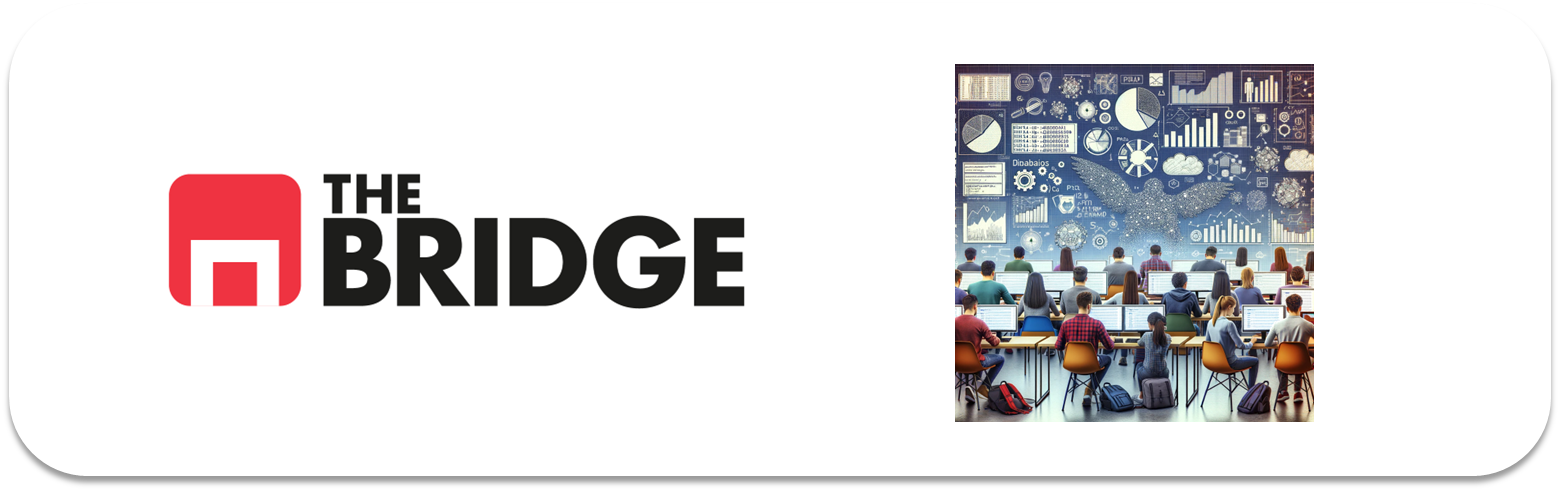

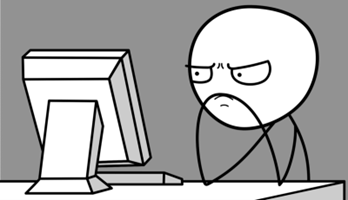

Para ejercitarte y afianzar lo aprendido sobre **Probabilidad**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.integrate import quad
from scipy.stats import gaussian_kde 


### Ejercicio 1

Asimilando las probabilidades de la muestra a la población (o su ratio), podemos estimar la probabilidad perecer en el titanic (cualquier pasajero no solo los de la muestra) como la probabilidad de escoger al azar un pasajero (de la población) y que hubiera fallacedio. En ese caso, calcula la probabiliad de perecer en el Titanic a partir de los datos contenidos en la muestra del fichero "./data/titanic.csv".

*Cargamos los datos*

In [2]:
df_t = pd.read_csv("./data/titanic.csv")

*En realidad este ejercicio lo hemos hecho ya unas cuantas veces, sólo que lo llamabamos ratio, y además lo he. Pero es el mismo cálculo. Aplicando Laplace:*


$$p(A) = \frac{\text {numero casos favorables}}{\text{numero casos posibles}}$$


*Aunque se llamen casos favorables en este casos contamos los casos "favorables" al suceso, es decir los fallecimientos*

In [3]:
num_casos_favorables = len(df_t.loc[df_t.alive == "no"])
num_casos_posibles = len(df_t)
p_perecer = round(num_casos_favorables/num_casos_posibles,2)
print("Probabilidad de perecer:", p_perecer)

Probabilidad de perecer: 0.62


### Ejercicio 2

Calcula la probabilidad de sobrevir de un pasajero escogido al azar de dos formas diferentes.

*OPCION 1. Mediante Laplace, como ya hemos hecho en la píldora del workout:*

In [4]:
casos_favorables =len(df_t.loc[df_t["alive"] == "yes"]) # Casos favorables: el número de personas que sobrevivieron
casos_totales = len(df_t)
print("p(sobrevivir) = ", round(casos_favorables/casos_totales,2))

p(sobrevivir) =  0.38


*OPCION 2. Teniendo en cuenta que sobrevivir y morir son sucesos excluyentes y que la probabilidad de la suma de todos los sucesos excluyentes es igual a la 1:*
* $p(sobrevivir) + p(fallecer) = 1$*
* Entonces, $p(sobrervivir)  = 1 - p(fallecer)$*

Y como la $p(fallecer) \approx 0.62$ según el primer ejercicio:*

In [5]:
print("p(sobrevir) = 1 - p(fallecer) = ", 1 - p_perecer )

p(sobrevir) = 1 - p(fallecer) =  0.38


*La explicación es p(sobrevivir) + p(fallecer) = 1, viene de que la probabilidad de que suceda cualquier posible evento es 1, (por ejemplo cual es la posibilidad de sacar un número entre 1 y 6 lanzando un dado de seis caras, pues eso 1). Es lo que se llama "suceso seguro" (porque es seguro que o sobrevives o mueres). En el caso de la variable who esta tiene tres valores "hombre", "mujer", "niño". El suceso seguro es "ser hombre o ser mujer o ser niño" y su probabilidad será 1 (cualquier pasajero esta categorizado en una de las tres categorías) y además son tres sucesos excluyentes (o se es uno o se es el otro)...*

### Ejercicio 3

Obten la probabilidad de escoger una persona al azar de nuestro pasaje del Titanic y que embarcase en otra ciudad que no fuera Southampton y muriese.

*Aplicando frecuencias/Laplace:*


$$p(A) = \frac{\text {numero casos favorables}}{\text{numero casos posibles}}$$

*Los casos favorables son los que cumplen las dos condiciones:*

In [6]:
cond_1 = df_t.embark_town != "Southampton"
cond_2 = df_t.alive == "no"

casos_favorables = len(df_t.loc[cond_1 & cond_2])



In [7]:
casos_totales = len(df_t)

In [8]:
p_suceso_complejo_1 = round(casos_favorables/casos_totales,3)
print("p(no embarcar en Southampton y morir) = ", p_suceso_complejo_1)

p(no embarcar en Southampton y morir) =  0.137


$p(\text{no embarcar en Southampton y morir}) = 0.137$

### Ejercicio 4

Obten la probabiliad de escoger una persona al azar del pasaje del Titanic y que hubiera embarcado en Southampton y sobreviviese. ¿Son sucesos independientes?


*Se trata, como en el ejercicio anterior, de un suceso ("embarcado en Southampton y sobrevivir") resultante de la intersección (fíjate en la y) de dos sucesos "escoger al azar un pasajero que haya embarcado en Southampton" y "escoger al azar un pasajero que sobreviviese". Obtengamos las probabilidades de ambos sucesos y del suceso intersección mediante frecuencias, ya que luego eso nos servirá para responder a la pregunta sobre la independencia:*

* $ A = \text{\{escoger un pasajero que embarcó en Southampton\}}, buscamos \  p(A)$  
* $ B = \text{\{escoger un pasajero que sobrevivió\}}, buscamos \ p(B)$  
* $p(\text{"escoger un pasajero que embarcó en Southampton y sobrevivió"}) = p(A \cap B)$

In [9]:
# p(escoger al azar un pasajero que embarcó en Southampton)
embarcar_en_southampton = df_t.embark_town == "Southampton"
casos_favorables = len(df_t.loc[embarcar_en_southampton])
casos_totales = len(df_t)
p_southampton = casos_favorables/casos_totales
print("p(emabarcar en southampton) = ", p_southampton)


p(emabarcar en southampton) =  0.7250280583613917


$p(A) \approx 0.725$

In [10]:
# p(escoger al azar un pasajero que sobrevivió)
sobrevivir = df_t.alive == "yes"
casos_favorables = len(df_t.loc[sobrevivir])
p_sobrevivir = casos_favorables/casos_totales
print("p(sobrevir) = ", p_sobrevivir ) 

p(sobrevir) =  0.3838383838383838


$p(B) \approx 0.384$

In [11]:
# p(interseccion), obtenida frecuencialmente
casos_favorables = len(df_t[embarcar_en_southampton & sobrevivir])
casos_totales = len(df_t)
p_south_sobrevivir = casos_favorables/casos_totales
print("p(escoger una pasajero de southampto y que sobrevivió) = ", p_south_sobrevivir)

p(escoger una pasajero de southampto y que sobrevivió) =  0.24579124579124578


$p(\text {escoger un pasajero que embarcó en Southampton y sobrevivió}) = p(A\cap B) \approx 0.246$

*Si fueran sucesos independientes:*
$p(A \cap B) = p(A) * p(B)$ 
*y el producto de las probabilidades tendría que ser similar al que hemos obtenido frecuencialmente (no tiene porqué ser igual porque las probabilidades frecuenciales son una división que de por sí termina siendo una aproximación, pero sí muy parecidas)... Comprobémoslo*

In [12]:
print("Son independientes? ", p_south_sobrevivir, p_southampton * p_sobrevivir)

Son independientes?  0.24579124579124578 0.278293598158918


*Con ese resultado no podemos decir que sean sucesos independientes*

### Ejercicio 5

Obten la probabilidad de escoger una persona al azar del Titanic y que o bien no hubiera embarcado en Southampton y hubiera muerto o bien hubiera embarcado en Southampton y sobreviviese. Hazlo apoyándote en las probabilidades de los ejercicios 3 y 4, si puedes.

*Puedes resolverlo usando frecuencias y poniendo todas las condiciones que indica el complejo suceso del ejercicio pero aquí lo vamos a hacer de otra forma... para que tengas también otra perspectiva*

*METODO 1: "Teórico"*

*Ahora el suceso es "escoger una persona al azar que o bien no haya embarcado en southampton y hubiera muerto o bien hubiera embarcado en Southampton y sobreviviese". Si te fijas es la unión de dos sucesos que ya conocemos: "escoger a una persona al azar que no hubiera embarcado en Southampton y muriese" y "escoger una persona al azar que hubiera embarcado en Southampton y sobreviviese". Que son los sucesos de los ejercicios 3 y 4*

* $ A = \text{\{"escoger a una persona al azar que no hubiera embarcado en Southampton y muriese"\}}$  
* $ B = \text{\{"escoger una persona al azar que hubiera embarcado en Southampton y sobreviviese"\}}$

*y buscamos $p(A \cup B)$*

*Nos tenemo que dar cuenta de que son sucesos (A y B) excluyentes (o embarcas en Southampto o no, o sobrevives o no), es decir ningún caso favorable de A está en el conjunto de casos favorables de B y por tanto la probabilildad de su unión es la suma de probabilidades:*

$$p(A\cup B) = p(A) + p(B)$$

Y aplicando los resultados del ejercicio 3 y del ejercicio 4:

$p(A) = p(\text{no embarcar en Southampton y morir}) = 0.137$  
$p(B) = p(\text {escoger un pasajero que embarcó en Southampton y sobrevivió}) \approx 0.246$

$$p(A \cup B) = 0.137 + 0.246 = 0.383$$

*METODO 2: Frecuencial*

In [13]:
no_en_southampton = df_t.embark_town != "Southampton"
morir = df_t.alive == "no"
condicion_suceso_A = no_en_southampton & morir

embarcar_en_southampton = df_t.embark_town == "Southampton"
sobrevivir = df_t.alive == "yes"
condicion_suceso_B = embarcar_en_southampton & sobrevivir

condicion_suceso_union = condicion_suceso_A | condicion_suceso_B

casos_favorables = len(df_t.loc[condicion_suceso_union])
casos_totales = len(df_t)

print("p(A U B, por frecuencias) approx. ->", round(casos_favorables/casos_totales,3))




p(A U B, por frecuencias) approx. -> 0.383


*Que coinciden, como era de esperar :-)*

### Ejercicio 6

Calcula la probabilidad de que escogiendo al azar entre las mujeres del pasaje del titanic esta subiera en Cherbourgh. ¿Qué tipo de probabilidad es? 

*Fíjate que a diferencias de las probabilidades anteriores aquí no escogemos al azar de todo el pasaje sino que lo limitamos (lo "condicionamos") a que sea el grupo del pasaje que es mujer. Se trata de una probabilidad condicionada. En concreto la probabiliad del suceso "escoger un pasajero que sea de Cherbourgh" condicinado al susceso "escoger un pasajero y ser mujer"...**Es un tipo de probabilidad condicionada***


$$ E = \text{"haber embarcado en Cherbourg"}$$
$$ F = \text{"ser mujer"}$$

*y buscamos:*

$$p(E|F) = \frac{p(E \cap F)}{p(F)}$$

*Vamos a calcularla obteniendo primero $p(E\cap F)$, luego $p(F)$ y luego dividiendo ambos*

*$p(E \cap F)$*

In [14]:
# Es el suceso intersección -> implica un and o & de condiciones, en este caso de "haber embarcado en Cherbourgh" y de "ser mujer"
ser_mujer = df_t.who == "woman"
embarcar_en_chebourgh = df_t.embark_town == "Cherbourg"

suceso_interseccion = embarcar_en_chebourgh & ser_mujer
casos_favorables = len(df_t.loc[suceso_interseccion])
casos_totales = len(df_t)

p_E_x_F = casos_favorables/casos_totales
print("p(E x F) = ", p_E_x_F)

p(E x F) =  0.06734006734006734


$p(F)$

In [15]:
# La condicion de F ya la hemos obtenido
casos_favorables = len(df_t[ser_mujer])
casos_totales = len(df_t)

p_F = casos_favorables/casos_totales
print("p(F) = ", p_F)

p(F) =  0.3041526374859708


$p(E|F) = \frac{p(E \cap F)}{p(F)}$

In [16]:
print("p(haber embarcado en Cherbourg siendo mujer) = ", p_E_x_F/p_F)

p(haber embarcado en Cherbourg siendo mujer) =  0.22140221402214022


### Ejercicio 7

Carga el dataset de satisfacción vital ("./data/lifesat_full.csv") y cacula cuál es la probabilidad de escoger al azar un país y que tenga una esperanza de vida superior a 80 años.

In [17]:
df_sat = pd.read_csv("./data/lifesat_full.csv")

*Como es la probabilidad de una variable continua sólo podemos o tiene sentido calcular la probabiliad de rangos de valores en este caso entre 80 e infinito, si recuerdas cómo lo hicimos en el workout. Siguiendo los pasos:*


*Primero tenemos que estimar la función densidad de probabilidad, para ello no hace falta pintarla, pero lo hacemos por ver qué pinta tiene y si nuestro cálculo aproximado lo es mucho o se ajusta bien:*

<Axes: xlabel='Life expectancy', ylabel='Count'>

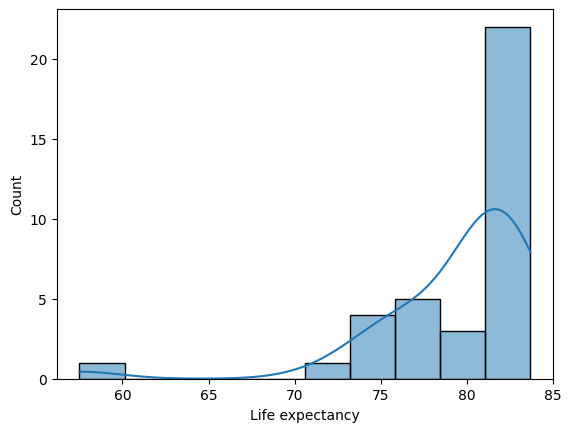

In [18]:
sns.histplot(x = "Life expectancy", data = df_sat, kde = True)

*Hmm hay claramennte un outlier, y un efecto tope que claramente deberiamos tener en cuenta, por lo que en vez de integrar ente 80 e infinito, vamos a hacerlo entre 80 y 85, lo cual lo convierte en una aproximación aún más aproximación*

$$p(life\_expectancy \geq 80) = \int_{80}^{\infty} f(x) \: \mathrm{d}x \approx  \int_{80}^{85} f(x) \: \mathrm{d}x  $$

In [19]:
f_densidad = gaussian_kde(df_sat["Life expectancy"])
rango_min = 80
rango_max = 85
probabilidad,_ = quad(f_densidad, rango_min, rango_max)
print("p(esperanza >= 80) = ", probabilidad)

p(esperanza >= 80) =  0.4738803942022418


$$p(life\_expectancy \geq 80) \approx 0.473$$

### Ejercicio 8

Una forma de obtener probabilidades es simulando eventos y luego aplicando la regla de Laplace. Por ejemplo, aunque la probabiliad de obtener un valor en una tirada de un dado es fácilmente calculable (1/6), podemos hacerlo también "lanzando" un dado 1000 veces y obteniendo sus frecuencias:

In [20]:
np.random.seed(42)

num_experimentos = 1000
resultados = {  # Variable diccionario para guardar las veces que sale cada cara
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0
}
for i in range(num_experimentos):
    resultado = np.random.randint(1,7) #Simulamos la tirada aleatoria uniforme de un dado
    resultados[resultado] += 1
for resultado,num_veces in resultados.items():
    print(f"El {resultado} salió {num_veces} veces, su probabilidad aproximada es: {round(num_veces/num_experimentos,3)}")

El 1 salió 181 veces, su probabilidad aproximada es: 0.181
El 2 salió 164 veces, su probabilidad aproximada es: 0.164
El 3 salió 154 veces, su probabilidad aproximada es: 0.154
El 4 salió 174 veces, su probabilidad aproximada es: 0.174
El 5 salió 172 veces, su probabilidad aproximada es: 0.172
El 6 salió 155 veces, su probabilidad aproximada es: 0.155


A medidad que más veces lancemos más nos aproximaremos a la probabilidad real, (1/6 = 0.1666...). Prueba por ejemplo a aumentar a 100000 el número de lanzamientos anterior o a disminuirlo a 10. Por eso muchas veces si no sabemos fácilmente como calcular la probabilidad real, acudimos a la simulación. 

 En base a lo anterior, simula el lanzamiento de 2 dados a la vez (Ojo no es np.random.randint(1,13), hay que hacer dos lanzamientos y sumarlos) y obtén las siguientes probabilidades (prueba con 10000 lanzamientos):

1. ¿El resultado más probable y su probabilidad? (Debería salirte "sacar un 7")
2. ¿El resultado más improbable y su probabiliad?
3. ¿La probabiliad de sacar un 3 y después un 4?

*Primero hacemos la simulación (fíjate que tenemos dos "tiradas" de dados):*

In [21]:
# Configuración inicial
np.random.seed(42)
num_experimentos = 10000

# Diccionario para guardar los resultados de la suma de dos dados
resultados_dos_dados = {}
for i in range(2, 13):
    resultados_dos_dados[i] = 0

# Simulación del lanzamiento de dos dados
for _ in range(num_experimentos):
    dado1 = np.random.randint(1, 7) # PRIMERA TIRADA
    dado2 = np.random.randint(1, 7) # SEGUNDA TIRADA
    suma = dado1 + dado2
    resultados_dos_dados[suma] += 1


*1. Resultado más probable y su probabilidad*

*El resultado más probables es básicamente el que más veces haya salido y su probabiliad la obtenemos precisamente diviendo ese resultado por el total de experimentos*

In [22]:

# 1. Resultado más probable, modo 1
max_apariciones = 0
resultado_max = []
for resultado, apariciones in resultados_dos_dados.items():
    if apariciones >= max_apariciones:
        resultado_max = resultado
        max_apariciones = apariciones
print(f"El {resultado_max} es el más probable con p({resultado_max}) = {max_apariciones/num_experimentos}")


El 7 es el más probable con p(7) = 0.1602


In [23]:

# Modo 2, usando argumentos de la función max:

resultado_max = max(resultados_dos_dados, key=resultados_dos_dados.get)
print(f"El {resultado_max} es el más probable con p({resultado_max}) = {resultados_dos_dados[resultado_max]/num_experimentos}")


El 7 es el más probable con p(7) = 0.1602


*2. ¿El resultado más improbable y su probabiliad?*

*De igual manera, el resultado más improbable será el que menos veces haya salido:*

In [24]:

# 1. Resultado más probable, modo 1
min_apariciones = num_experimentos # Para ir acumulando el mínimo desde el principio
resultado_min = []
for resultado, apariciones in resultados_dos_dados.items():
    if apariciones <= min_apariciones:
        resultado_min = resultado
        min_apariciones = apariciones
print(f"El {resultado_min} es el más improbable con p({resultado_min}) = {min_apariciones/num_experimentos}")

El 12 es el más improbable con p(12) = 0.0285


In [25]:
# Modo 2, usando argumentos de la función min:
resultado_min = min(resultados_dos_dados, key=resultados_dos_dados.get)
print(f"El {resultado_min} es el más improbable con p({resultado_min}) = {resultados_dos_dados[resultado_min]/num_experimentos}")
 

El 12 es el más improbable con p(12) = 0.0285


*En realidad aquí se ve una de las limitaciones (salvable ojo) de la simulación, si hicieramos el cálculo dividiendo casos favorables del espacio muestral sobre casos totales, saldría que el 2 y el 12 son los resultados más improbables con la misma probabilidad (son los dos únicos resultados que requieren un resultado doble, doble 1 y doble 6, para poder salir) que sería:*



$p(12) = p_{primer\_dado}(6) * p_{segundo\_dado}(6) = 1/6 * 1/6 = 1/36 \approx 0.0278$
  
$p(2) = p_{primer\_dado}(1) * p_{segundo\_dado}(6) = 1/6 * 1/6 = 1/36 \approx 0.0278$

*NOTA: Ten en cuenta que los lanzamientos de dos dados, no manipulados, son sucesos independientes ente sí de ahí el producto de probabiliades*

*3.¿La probabiliad de sacar un 3 y después un 4?*

*En este caso estamos tratando la probabilidad de sacar un 4 habiendo sacado un 3 en la tirada anterior... Simulando:*

In [26]:
# Configuración inicial
np.random.seed(42)
num_experimentos = 100000

# Diccionario para guardar los resultados de la suma de dos dados
resultados_dos_dados = {}
for i in range(2, 13):
    resultados_dos_dados[i] = 0

caso_favorable = 0
# Simulación del lanzamiento de dos dados
for _ in range(num_experimentos):
    dado1 = np.random.randint(1, 7) # PRIMERA TIRADA
    dado2 = np.random.randint(1, 7) # SEGUNDA TIRADA
    if dado1 == 3 and dado2 == 4:
        caso_favorable += 1
    suma = dado1 + dado2
    resultados_dos_dados[suma] += 1
print("probabilidad de sacar un 3 y luego un 4:", caso_favorable/num_experimentos)

probabilidad de sacar un 3 y luego un 4: 0.02792


*Pero si lo piensas, cada tirada es independiente de la anterior (es decir que sacar un 4 en la segunda tirada no depende de lo que haya sacado en la primera y viceversa) por lo que la probablidad de la intersección es el producto de interseccioes (ojo considerando ahora tirar un único dado, ya lo sé, es lioso lo veremos en la sesión en vivo), :*

$$p(\text{sacar primero un 3 y luego un 4}) = p(\text{sacar un 3 con un dado}) \times p(\text{sacar un 4 con un dado}) =   
1/6 * 1/6 \approx 0.0278$$